In [369]:
import pandas as pd
import numpy as np

hierarchy_path = 'data\hierarchy.txt'
id_to_name_path = 'data\id_to_name.txt'

def convert_df_to_np(df):
    return df.to_numpy()

def convert_np_to_df(nparray):
    dataframe = pd.DataFrame(data=nparray)
    return dataframe

df_hie = pd.read_csv(hierarchy_path, sep=" ", header=None)
df_className = pd.read_csv(id_to_name_path, sep="\t", header=None)

HIERARCHY_NUMPY = convert_df_to_np(df_hie)
ID2NAME_NUMPY = convert_df_to_np(df_className)

Output()

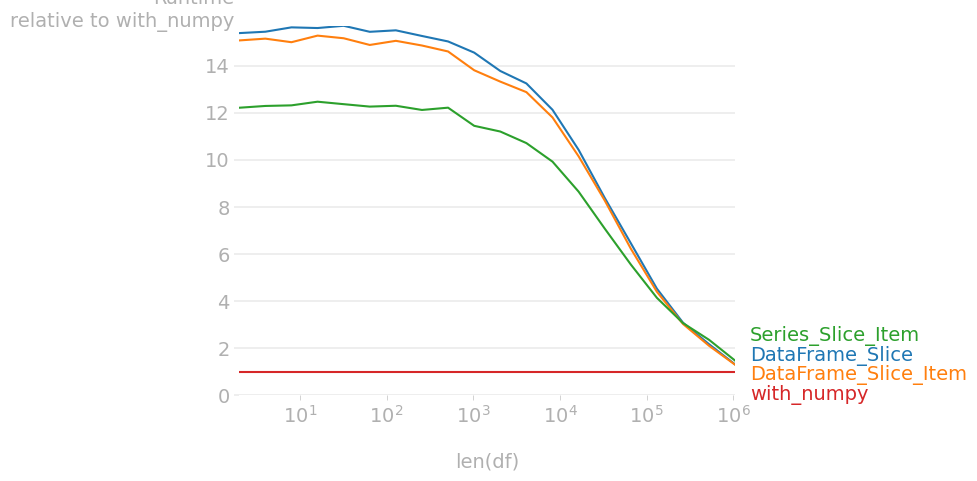

In [359]:
import perfplot
import pandas as pd
import numpy as np

def DataFrame_Slice(df, code=0):
    return df.loc[df['code1'] == code, 'code2'].iloc[0]

def DataFrame_Slice_Item(df, code=0):
    return df.loc[df['code1'] == code, 'code2'].item()

def Series_Slice_Item(df, code=0):
    return df['code2'][df['code1'] == code].item()

def with_numpy(df, code=0):
    return df['code2'].to_numpy()[df['code1'].to_numpy() == code].item()


perfplot.show(
    setup=lambda N: pd.DataFrame({'code1': range(N),
                                  'code2': range(50, N+50),
                                  'code3': range(100, N+100)}),
    kernels=[
        lambda df: DataFrame_Slice(df),
        lambda df: DataFrame_Slice_Item(df),
        lambda df: Series_Slice_Item(df),
        lambda df: with_numpy(df)
    ],
    labels=['DataFrame_Slice', 'DataFrame_Slice_Item', 'Series_Slice_Item', 'with_numpy'],
    n_range=[2 ** k for k in range(1, 21)],
    equality_check=np.allclose,  
    relative_to=3,
    xlabel='len(df)'
)

In [377]:


def get_class_name(dfNumpy, classID):
    index = np.where(dfNumpy == classID)
    return dfNumpy[index[0].item()][1]

def get_classID(dfNumpy, className):
    charter = f', {className},'
    classNameArray = dfNumpy[:, 1]
    indices = find_indices(classNameArray, className)
    ##remove fail index##
    failIndices = []
    for i,index in enumerate(indices):
        value = df2[index][1]
        x = value.split(", ")
        if className not in x:
            failIndices.append(i)
        else:
            pass
    indices = np.delete(indices, failIndices)
    
    classIDs = [dfNumpy[i][0] for i in indices]
    return classIDs, indices

def find_indices(array, element):
    array = array.astype('<U36')
    indices = np.flatnonzero(np.core.defchararray.find(array,element)!=-1)
    return indices
    
def find_parent_by_ID(dfNumpy, classID):
    childClassIDs = dfNumpy[:,1]
    childIdxs = find_indices(childClassIDs, classID)
    parents = [dfNumpy[i][0] for i in childIdxs]
    if len(parents) == 0:
        return False
    else:
        return parents[0]
    
def find_parent(dfNumpy, className):
    pass
def find_ancestor(dfNumpy, className):
    pass



In [378]:
classIDs, indices = get_classID(ID2NAME_NUMPY, 'target')

classIDs, indices
print(classIDs, indices)

import time

start = time.time()
df_filted = np.array([ID2NAME_NUMPY[i] for i in indices])
df = pd.DataFrame(data=df_filted)


print(time.time() - start)
df    

['n04394261', 'n05981230', 'n07262108', 'n08660934', 'n10470460'] [24472 32709 39288 46936 56683]
0.0


,0,1
0,n04394261,"target, butt"
1,n05981230,"aim, object, objective, target"
2,n07262108,"target, mark"
3,n08660934,"target, target area"
4,n10470460,"prey, quarry, target, fair game"


In [379]:
def convert_df_to_np(df):
    return df.to_numpy()

def convert_np_to_df(nparray):
    dataframe = pd.DataFrame(data=df_filted)
    return dataframe

def get_class_name(dfNumpy, classID):
    index = np.where(dfNumpy == classID)
    return dfNumpy[index[0].item()][1]

def get_classID(dfNumpy, className):
    charter = f', {className},'
    classNameArray = dfNumpy[:, 1]
    indices = find_indices(classNameArray, className)
    ##remove fail index##
    failIndices = []
    for i,index in enumerate(indices):
        value = df2[index][1]
        x = value.split(", ")
        if 'object' not in x:
            failIndices.append(i)
        else:
            pass
    indices = np.delete(indices, failIndices)
    
    classIDs = [dfNumpy[i][0] for i in indices]
    return classIDs, indices

def find_indices(array, element):
    array = array.astype('<U36')
    indices = np.flatnonzero(np.core.defchararray.find(array,element)!=-1)
    return indices
    
def find_parent_by_ID(dfNumpy, classID):
    childClassIDs = dfNumpy[:,1]
    childIdxs = find_indices(childClassIDs, classID)
    parents = [dfNumpy[i][0] for i in childIdxs]
    if len(parents) == 0:
        return False
    else:
        return parents[0]

def find_child_of_parent(dfNumpy=HIERARCHY_NUMPY, classID=None):
    parentClassIDs = dfNumpy[:,0]
    indices = find_indices(parentClassIDs, classID)
    childClassIDs = [dfNumpy[i][1] for i in indices]
    return childClassIDs
def find_ancestor(dfNumpy, className):
    pass

siblingIDs = find_child_of_parent(classID = 'n09428967')
idx = np.searchsorted(ID2NAME_NUMPY[:, 0], siblingIDs)
print(siblingIDs, idx)

df_new = [ID2NAME_NUMPY[a] for a in idx]
df_new
print(convert_np_to_df(df_new))


['n09337406', 'n09269972', 'n09420689', 'n15009192', 'n09193282'] [50142 49798 50562 80484 49404]
           0                                1
0  n04394261                     target, butt
1  n05981230   aim, object, objective, target
2  n07262108                     target, mark
3  n08660934              target, target area
4  n10470460  prey, quarry, target, fair game


In [385]:

A = np.array([1,2,3,4,5,6,7,8,9,10])
B = np.array([1,7,3,10])

x = A.searchsorted(B)
np.unique(x)

array([0, 2, 6, 9], dtype=int64)

In [291]:
##Find ClassIDs
classIDs, indices = get_classID(df2, 'object')

print(classIDs, indices)

import time

start = time.time()
df_filted = np.array([df2[i] for i in indices])
df = pd.DataFrame(data=df_filted)

# df_filted = df1.loc[df1.index[indices]]
# print(df_filted)
print(time.time() - start)
df    



['n00002684', 'n05810948', 'n05981230', 'n06132724', 'n06310237'] [    4 31872 32709 33268 34096]
0.0009968280792236328


,0,1
0,n00002684,"object, physical object"
1,n05810948,object
2,n05981230,"aim, object, objective, target"
3,n06132724,object
4,n06310237,object


In [294]:
df = pd.read_csv('data\hierarchy.txt', sep=" ", header=None)
dfNumpy = convert_df_to_np(df)
df_className_Numpy = convert_df_to_np(df_className)
childClassIDs = dfNumpy[:,1]
childIdxs = find_indices(childClassIDs, 'n04917292')
parents = [dfNumpy[i][0] for i in childIdxs]
print(df)
parents[0]
dfNumpy

               0          1
0      n02118333  n02119789
1      n02471300  n02478875
2      n02471762  n02473983
3      n02100399  n02100735
4      n02374149  n02390258
...          ...        ...
75845  n05178394  n13241407
75846  n04916342  n04917292
75847  n05074774  n05078289
75848  n12987056  n12990597
75849  n05943300  n06186301

[75850 rows x 2 columns]


array([['n02118333', 'n02119789'],
       ['n02471300', 'n02478875'],
       ['n02471762', 'n02473983'],
       ...,
       ['n05074774', 'n05078289'],
       ['n12987056', 'n12990597'],
       ['n05943300', 'n06186301']], dtype=object)

In [293]:
# parentID = find_parent_by_ID(dfNumpy, 'n04916342')

className = 'object'
classIDs, indices = get_classID(df_className_Numpy, className)

print(f"there are {len(indices)} classIDs corresponding to the class name {className}")

for i, classID in enumerate(classIDs):
    parentID = find_parent_by_ID(dfNumpy, classID)
    childClassNames = get_class_name(df_className_Numpy,classID)
    parentClassNames = get_class_name(df_className_Numpy,parentID)
    print(f'##ID: {classID}\
            \nchild : {classID} --  {childClassNames} \
            \nparent: {parentID} --  {parentClassNames}')
# classIDs, indices

there are 5 classIDs corresponding to the class name object
##ID: n00002684            
child : n00002684 --  object, physical object             
parent: n00001930 --  physical entity
##ID: n05810948            
child : n05810948 --  object             
parent: n05809192 --  content, cognitive content, mental object
##ID: n05981230            
child : n05981230 --  aim, object, objective, target             
parent: n05980875 --  goal, end
##ID: n06132724            
child : n06132724 --  object             
parent: n06128570 --  computer science, computing
##ID: n06310237            
child : n06310237 --  object             
parent: n06312966 --  constituent, grammatical constituent


In [313]:
#######
parentID = 'n05078289'
while True:
    parentID = find_parent_by_ID(dfNumpy,parentID)
    if parentID == False:
        break
    else:
        print(parentID,get_class_name(df_className_Numpy,parentID))
######
# parentID

n05074774 position, spatial relation
n00031921 relation
n00002137 abstraction, abstract entity
n00001740 entity
